# Multi Linear Regression (50 Startups)

Shubham's Assignment

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import dataset
startups = pd.read_csv('50_Startups.csv')
startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
len(startups)

50

In [5]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
startups.shape

(50, 5)

In [7]:
#graphical representation

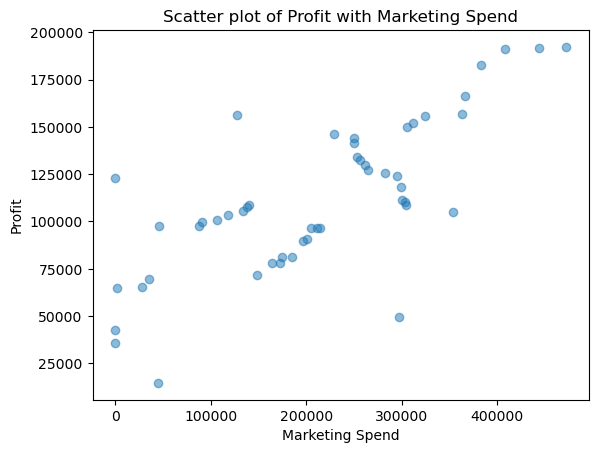

In [8]:
plt.scatter(startups['Marketing Spend'], startups['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

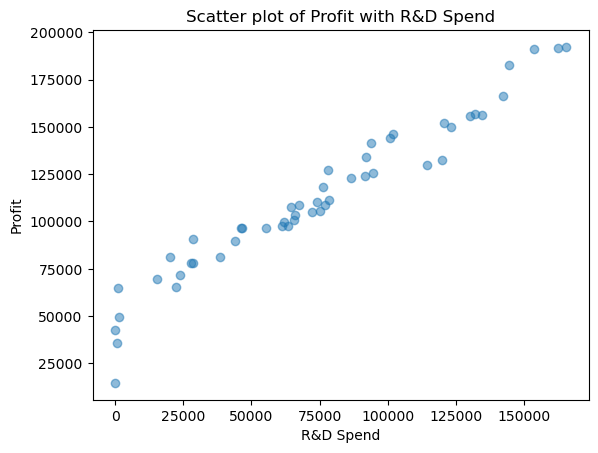

In [10]:
plt.scatter(startups['R&D Spend'], startups['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

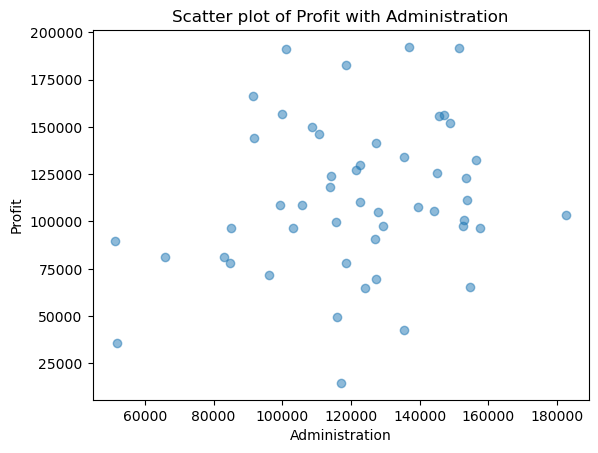

In [11]:
plt.scatter(startups['Administration'], startups['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

In [12]:
#create figure object

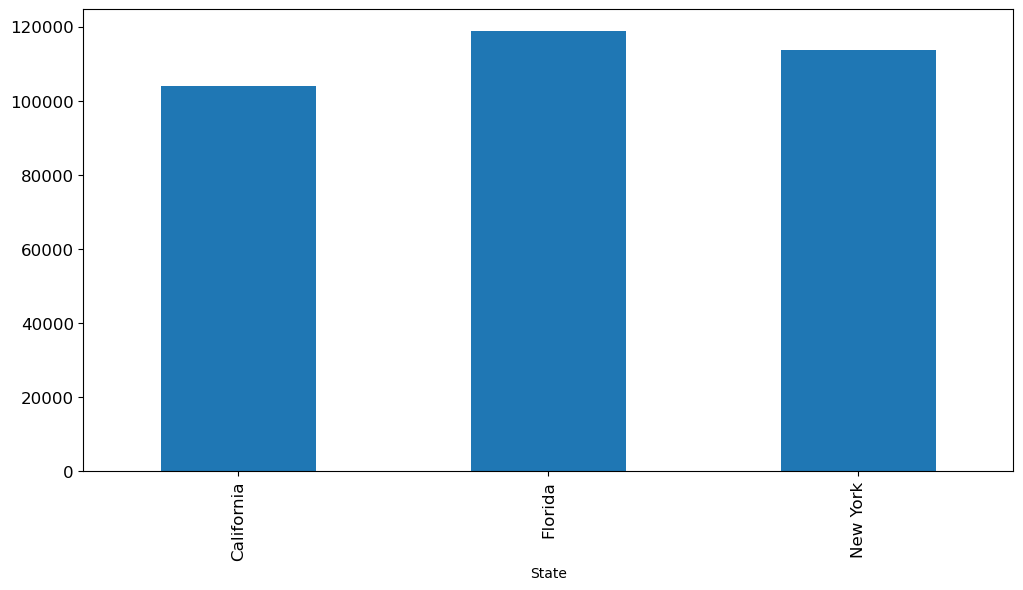

In [13]:
ax=startups.groupby(['State'])['Profit'].mean().plot.bar(figsize=(12,6), fontsize=12)

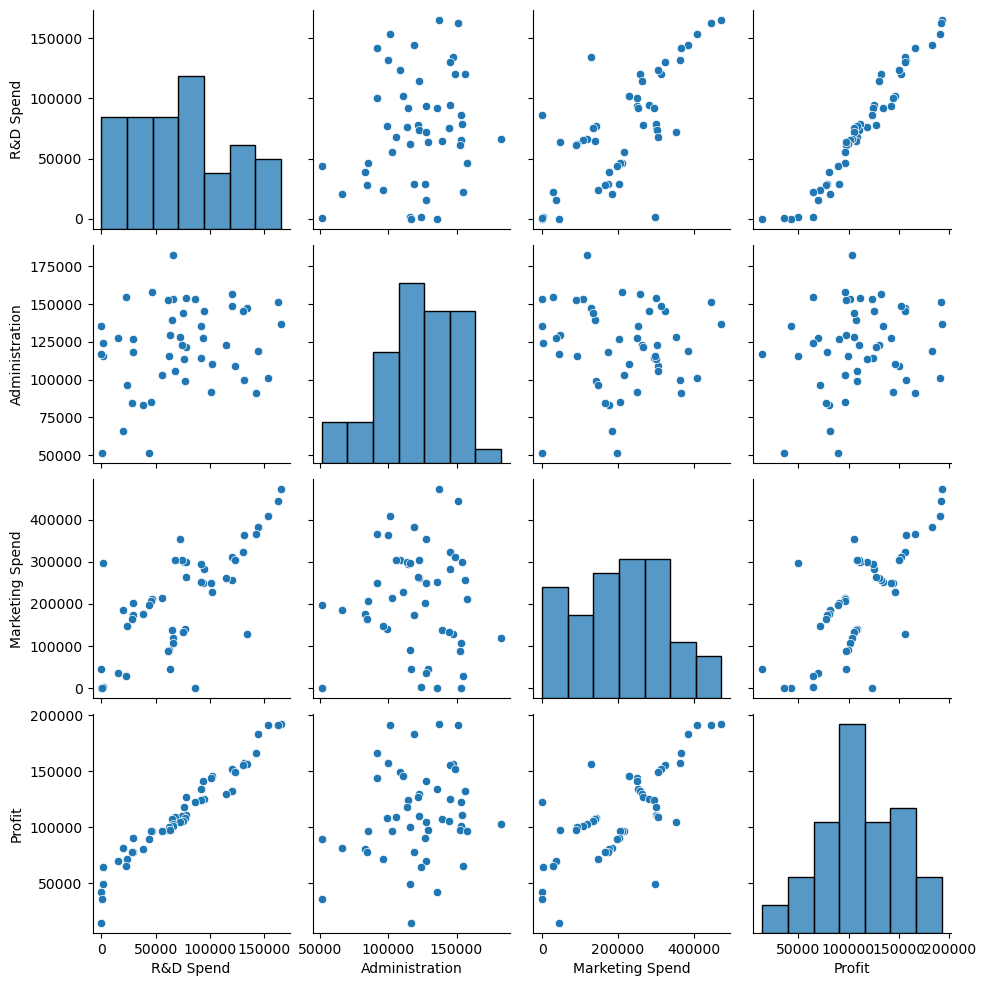

In [14]:
ax=sns.pairplot(startups)

In [16]:
startups.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [17]:
#Create dummy variable for States

In [18]:
startups['New York_State']= np.where(startups['State']=='New York',1,0)

In [19]:
startups['California_State']= np.where(startups['State']=='California',1,0)

In [20]:
startups['Florida_State']= np.where(startups['State']=='Florida',1,0)

In [21]:
#drop original coloumn states from dataset

In [22]:
startups.drop(columns=['State'], axis=1, inplace=True)

In [23]:
startups.head()

,R&D Spend,Administration,Marketing Spend,Profit,New York_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [24]:
dependent_variable='Profit'

In [25]:
#create list of independent variables

In [26]:
independent_variables=startups.columns.tolist()

In [27]:
independent_variables.remove(dependent_variable)

In [28]:
independent_variables

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'New York_State',
 'California_State',
 'Florida_State']

In [29]:
#create data of independent variables

In [30]:
X=startups[independent_variables].values
X

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2333488e+05, 1.0867917e+05,

In [31]:
# Create the Dependent Variables Data

In [32]:
y=startups[dependent_variable].values
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [33]:
#Split data into training set and test set

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
#transform data

In [36]:
scaler=MinMaxScaler()

In [37]:
X_train=scaler.fit_transform(X_train)

In [38]:
X_test=scaler.transform(X_test)

In [39]:
# Training the Multiple Linear Regression model on the Training set

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [41]:
# Predicting the Test set results

In [42]:
y_pred = regressor.predict(X_test)

In [43]:
math.sqrt(mean_squared_error(y_test, y_pred))

9137.990152794959

In [44]:
r2_score(y_test, y_pred)

0.9347068473282423

In [45]:
#Done